In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [348]:
df = pd.read_csv('Clean_Healthcare_df_transposed_v7.csv', index_col=0)

In [349]:
df.head(30)

,Date,Total Expenditure,Out of pocket,Health Insurance,Private Health Insurance,Medicare,Medicaid (Title XIX)
1,1995-01,1021635,144816,681480,325339,184393,144862
2,1996-01,1074409,150354,722124,343686,198750,152170
3,1997-01,1135224,161370,758320,359553,210376,160849
4,1998-01,1201451,176812,792102,384738,209420,169011
5,1999-01,1277700,187575,845592,417078,213173,183455
6,2000-01,1369125,198886,918957,457978,224829,200345
7,2001-01,1486158,206200,1014390,501939,247686,224092
8,2002-01,1628624,219273,1121517,560963,265381,248050
9,2003-01,1767567,235635,1221745,615138,282668,268903
10,2004-01,1895724,248494,1320086,658268,311122,290679


In [350]:
df.Date.head().values

array(['1995-01', '1996-01', '1997-01', '1998-01', '1999-01'], dtype=object)

In [351]:
pd.to_datetime(df.Date)

1    1995-01-01
2    1996-01-01
3    1997-01-01
4    1998-01-01
5    1999-01-01
6    2000-01-01
7    2001-01-01
8    2002-01-01
9    2003-01-01
10   2004-01-01
11   2005-01-01
12   2006-01-01
13   2007-01-01
14   2008-01-01
15   2009-01-01
16   2010-01-01
17   2011-01-01
18   2012-01-01
19   2013-01-01
20   2014-01-01
21   2015-01-01
22   2016-01-01
Name: Date, dtype: datetime64[ns]

In [352]:
df.shape

(22, 7)

In [353]:
df.columns.values

array(['Date', 'Total Expenditure', '     Out of pocket',
       '     Health Insurance', '          Private Health Insurance',
       '          Medicare', '          Medicaid (Title XIX)'], dtype=object)

In [354]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['Year'] = df.index.year
df['Month'] = df.index.month

In [355]:
df.head(20)

,Total Expenditure,Out of pocket,Health Insurance,Private Health Insurance,Medicare,Medicaid (Title XIX),Year,Month
Date,,,,,,,,
1995-01-01,1021635,144816,681480,325339,184393,144862,1995,1
1996-01-01,1074409,150354,722124,343686,198750,152170,1996,1
1997-01-01,1135224,161370,758320,359553,210376,160849,1997,1
1998-01-01,1201451,176812,792102,384738,209420,169011,1998,1
1999-01-01,1277700,187575,845592,417078,213173,183455,1999,1
2000-01-01,1369125,198886,918957,457978,224829,200345,2000,1
2001-01-01,1486158,206200,1014390,501939,247686,224092,2001,1
2002-01-01,1628624,219273,1121517,560963,265381,248050,2002,1
2003-01-01,1767567,235635,1221745,615138,282668,268903,2003,1


In [356]:
df.columns.values

array(['Total Expenditure', '     Out of pocket', '     Health Insurance',
       '          Private Health Insurance', '          Medicare',
       '          Medicaid (Title XIX)', 'Year', 'Month'], dtype=object)

In [357]:
df.index

DatetimeIndex(['1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [358]:
df.columns = [x.strip() for x in df.columns.values]

In [359]:
df.columns

Index(['Total Expenditure', 'Out of pocket', 'Health Insurance',
       'Private Health Insurance', 'Medicare', 'Medicaid (Title XIX)', 'Year',
       'Month'],
      dtype='object')

In [360]:
df['Medicare'].unique()

array([184393, 198750, 210376, 209420, 213173, 224829, 247686, 265381,
       282668, 311122, 339762, 403690, 432751, 466971, 498859, 519787,
       544679, 569634, 590163, 618889, 648808, 672093])

### SETTING JANUARY 1 AS A FOCAL POINT AND AGGREGATING OVER OTHER VARIABLES

In [361]:
Medicare1= df[df['Month'] == 1][['Total Expenditure']].resample('A').sum()
Medicare1.head(20)

,Total Expenditure
Date,
1995-12-31,1021635
1996-12-31,1074409
1997-12-31,1135224
1998-12-31,1201451
1999-12-31,1277700
2000-12-31,1369125
2001-12-31,1486158
2002-12-31,1628624
2003-12-31,1767567


### PLOTTING THE ROLLING MEAN FOR THE ANNUAL TOTAL EXPENDITURE

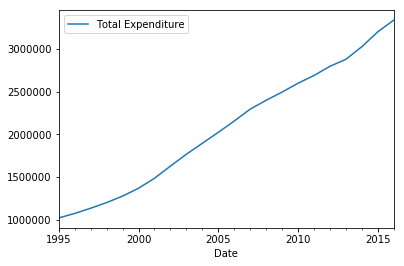

In [362]:
Medicare1[['Total Expenditure']].rolling(window=1).mean().plot()

### COMPUTING 1,2,5, AND 10 AUTOCORRELATIONS FOR TOTAL EXPENDITURE WITH AUTOCORRELATION PLOT

In [363]:
print('Autocorrelation 1: ', Medicare1['Total Expenditure'].autocorr(1))
print('Autocorrelation 2: ', Medicare1['Total Expenditure'].autocorr(2))
print('Autocorrelation 5: ', Medicare1['Total Expenditure'].autocorr(5))
print('Autocorrelation 10: ', Medicare1['Total Expenditure'].autocorr(10))

Autocorrelation 1:  0.999257610146
Autocorrelation 2:  0.997324827822
Autocorrelation 5:  0.988860595717
Autocorrelation 10:  0.988289784789


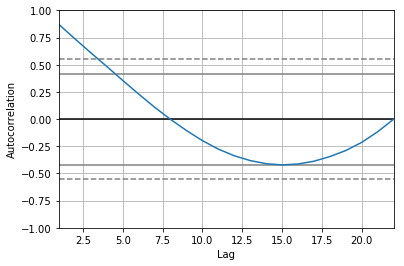

In [364]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(Medicare1['Total Expenditure'])

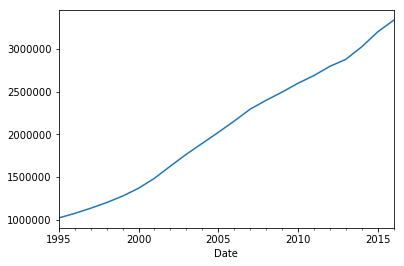

In [365]:
Medicare1['Total Expenditure'].dropna().plot()

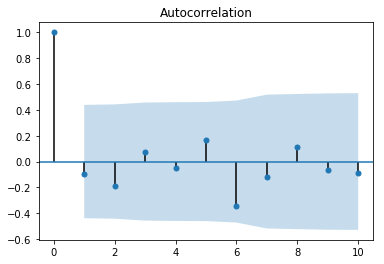

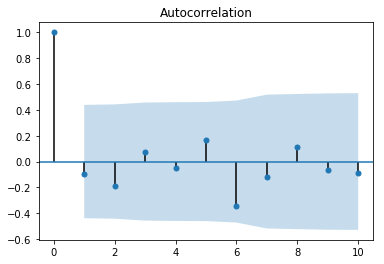

In [366]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(Medicare1['Total Expenditure'].diff(1).diff(1).dropna(), lags=10)

### SPLIT ANNUAL EXPENDITURE INTO TRAINING AND TEST SET USING - 75% TRAINING

In [367]:
n = len(Medicare1['Total Expenditure'])

#train = Medicare1['Total Expenditure'][:int(.75*n)].astype('float')
train = df['Total Expenditure'][:int(.75*n)].astype('float')
test = Medicare1['Total Expenditure'][int(.75*n):]

In [368]:
type(train)
train.dtype

dtype('float64')

### AR(1) MODEL ON TRAINING DATA TO COMPUTE MEAN ABSOLUTE ERROR OF PREDICTION

In [369]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [370]:
model = sm.tsa.ARIMA (train, (1, 2, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                               
================================================================================
Dep. Variable:     D2.Total Expenditure   No. Observations:                   14
Model:                   ARIMA(1, 2, 0)   Log Likelihood                -153.463
Method:                         css-mle   S.D. of innovations          13882.776
Date:                  Thu, 18 Jan 2018   AIC                            312.926
Time:                          15:41:41   BIC                            314.843
Sample:                      01-01-1997   HQIC                           312.748
                           - 01-01-2010                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3861.0266   5407.054      0.714      0.489   -6736.604    1.45e+04
ar.L1.D2.Total Expenditure     0.3367      0.241      1.399      0.187      -0.135       0.808
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.9703           +0.0000j            2.9703            0.0000
-----------------------------------------------------------------------------
"""

In [371]:
train

Date
1995-01-01    1021635.0
1996-01-01    1074409.0
1997-01-01    1135224.0
1998-01-01    1201451.0
1999-01-01    1277700.0
2000-01-01    1369125.0
2001-01-01    1486158.0
2002-01-01    1628624.0
2003-01-01    1767567.0
2004-01-01    1895724.0
2005-01-01    2023744.0
2006-01-01    2156158.0
2007-01-01    2295307.0
2008-01-01    2399121.0
2009-01-01    2495414.0
2010-01-01    2598823.0
Name: Total Expenditure, dtype: float64

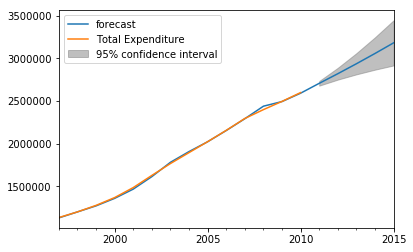

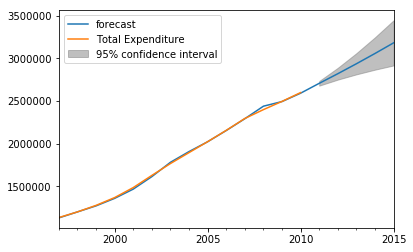

In [372]:
model.plot_predict(2, 20, plot_insample=True)

In [374]:
model.predict(2, 20)

1997-01-01     3861.026557
1998-01-01     5268.281600
1999-01-01     4383.186620
2000-01-01     5935.216995
2001-01-01     7670.393687
2002-01-01    11182.493658
2003-01-01    11123.577103
2004-01-01     1375.075689
2005-01-01    -1070.129650
2006-01-01     2515.026849
2007-01-01     4040.460607
2008-01-01     4828.595771
2009-01-01    -9334.943893
2010-01-01       29.084921
2011-01-01     4956.865527
2012-01-01     4229.958307
2013-01-01     3985.233342
2014-01-01     3902.842761
2015-01-01     3875.104652
Freq: AS-JAN, dtype: float64

/Users/judenwosu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=44.0, right=44.0
  'left=%s, right=%s') % (left, right))


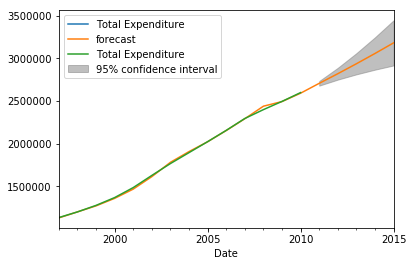

In [375]:
#plot_insample is for 200 in the future

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = Medicare1['2014'].plot(ax=ax)
fig = model.plot_predict(2, 20, ax=ax, plot_insample=True)

## COMPUTING ARMA MODEL (p,d,q) TO IMPROVE PREDICTION ERROR

In [377]:
model = sm.tsa.ARIMA (train, (1, 1, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                              
===============================================================================
Dep. Variable:     D.Total Expenditure   No. Observations:                   15
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -164.486
Method:                        css-mle   S.D. of innovations          13100.284
Date:                 Thu, 18 Jan 2018   AIC                            336.971
Time:                         15:42:38   BIC                            339.804
Sample:                     01-01-1996   HQIC                           336.941
                          - 01-01-2010                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       9.45e+04    2.1e+04      4.500      0.001    5.33e+04    1.36e+05
ar.L1.D.Total Expenditure     0.7970      0.163      4.883      0.000       0.477       1.117
ma.L1.D.Total Expenditure     0.5099      0.256      1.991      0.070       0.008       1.012
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2547           +0.0000j            1.2547            0.0000
MA.1           -1.9612           +0.0000j            1.9612            0.5000
-----------------------------------------------------------------------------
"""

In [378]:
train.values

array([ 1021635.,  1074409.,  1135224.,  1201451.,  1277700.,  1369125.,
        1486158.,  1628624.,  1767567.,  1895724.,  2023744.,  2156158.,
        2295307.,  2399121.,  2495414.,  2598823.])

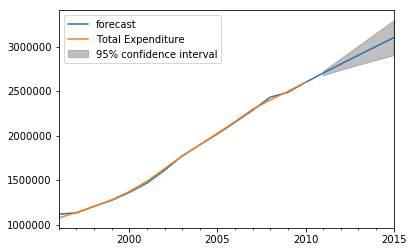

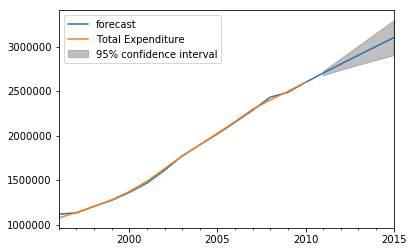

In [379]:
model.plot_predict(1, 20, plot_insample=True)

In [380]:
test.keys()

DatetimeIndex(['2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', freq='A-DEC')

In [390]:
model.predict(2, 30)

1997-01-01     57499.422183
1998-01-01     69044.423621
1999-01-01     70592.063235
2000-01-01     82805.181752
2001-01-01     96431.134665
2002-01-01    122955.483761
2003-01-01    142675.631253
2004-01-01    128018.572461
2005-01-01    121395.599214
2006-01-01    124593.465976
2007-01-01    128705.461788
2008-01-01    135410.807364
2009-01-01     85812.591676
2010-01-01    101272.546162
2011-01-01    102689.719029
2012-01-01    101027.102709
2013-01-01     99701.965314
2014-01-01     98645.805155
2015-01-01     97804.025061
2016-01-01     97133.110028
2017-01-01     96598.377759
2018-01-01     96172.185787
2019-01-01     95832.502535
2020-01-01     95561.768406
2021-01-01     95345.988064
2022-01-01     95174.006954
2023-01-01     95036.934679
2024-01-01     94927.685423
2025-01-01     94840.611650
Freq: AS-JAN, dtype: float64

### PLOTTING THE RESIDUALS

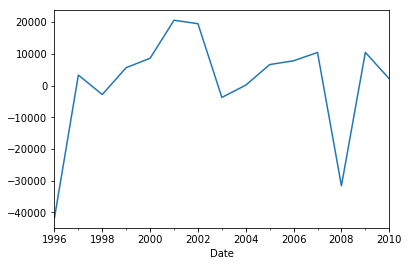

In [382]:
model.resid.plot()

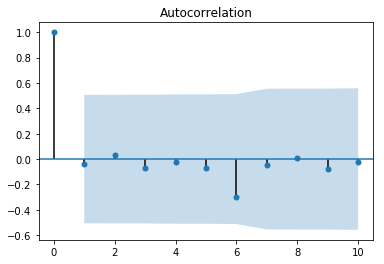

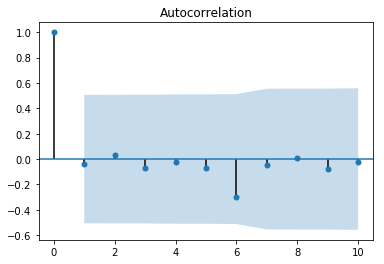

In [383]:
plot_acf(model.resid, lags=10)

/Users/judenwosu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=46.0, right=46.0
  'left=%s, right=%s') % (left, right))


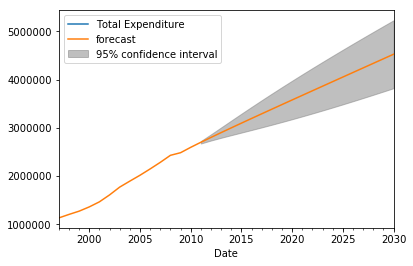

In [391]:
import matplotlib.pyplot as plt 
 
fig, ax = plt.subplots() 
ax = Medicare1['2016'].plot(ax=ax) 
 
fig = model.plot_predict(2, 35, ax=ax, plot_insample=False)

## ADDITIONAL EXPLORATORY ANALYSIS ON THE HEALTHCARE EXPENDITURE DATASET

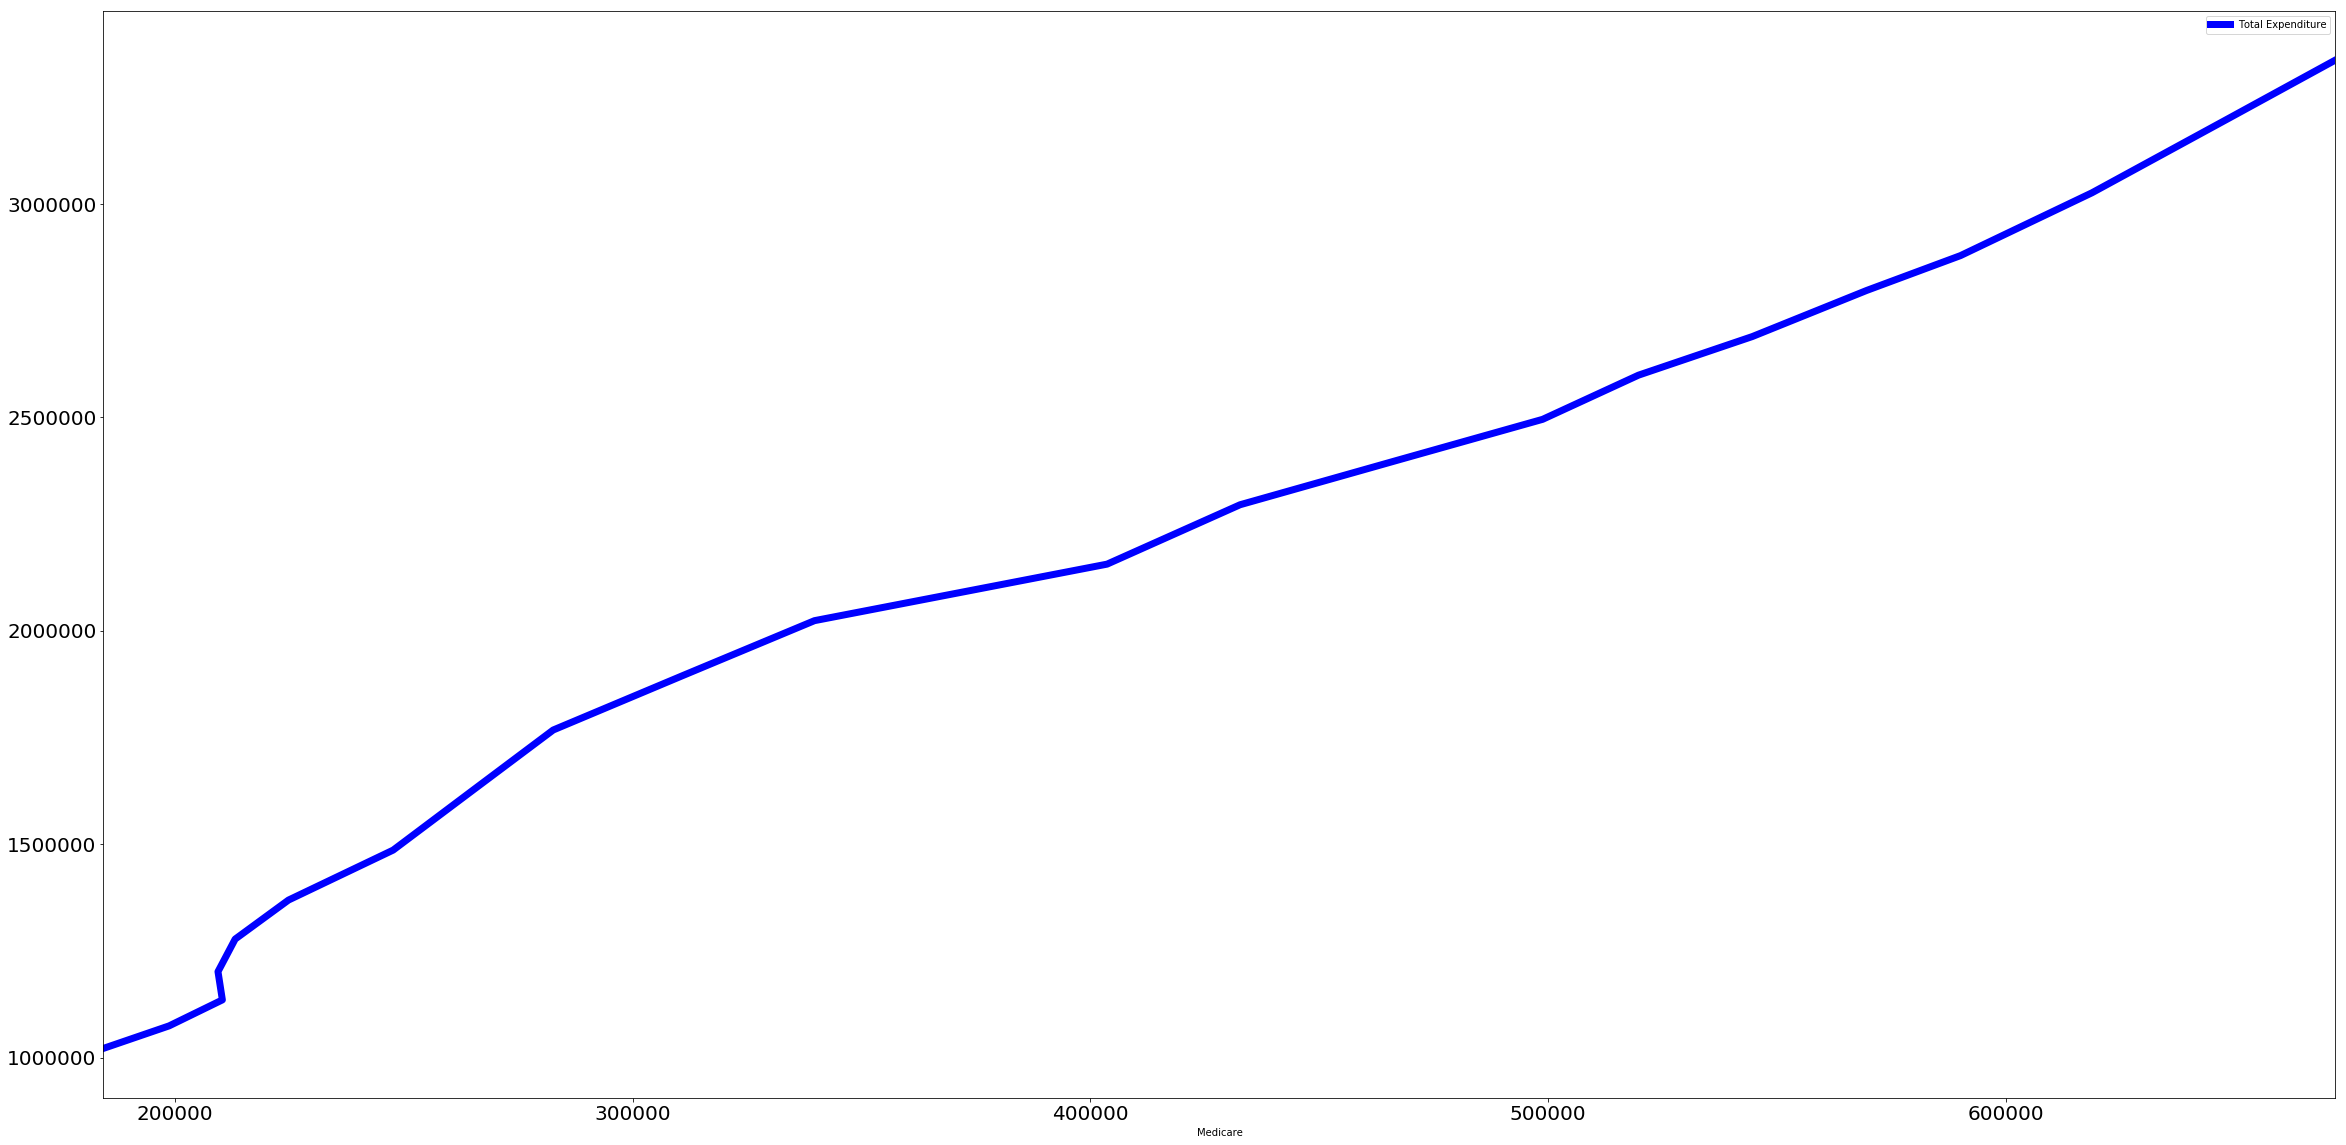

In [23]:
Medicare1.plot(kind='line', figsize=(40,20), fontsize=20 , legend=True, linewidth=7.0, x='Medicare', y='Total Expenditure', color ='blue')

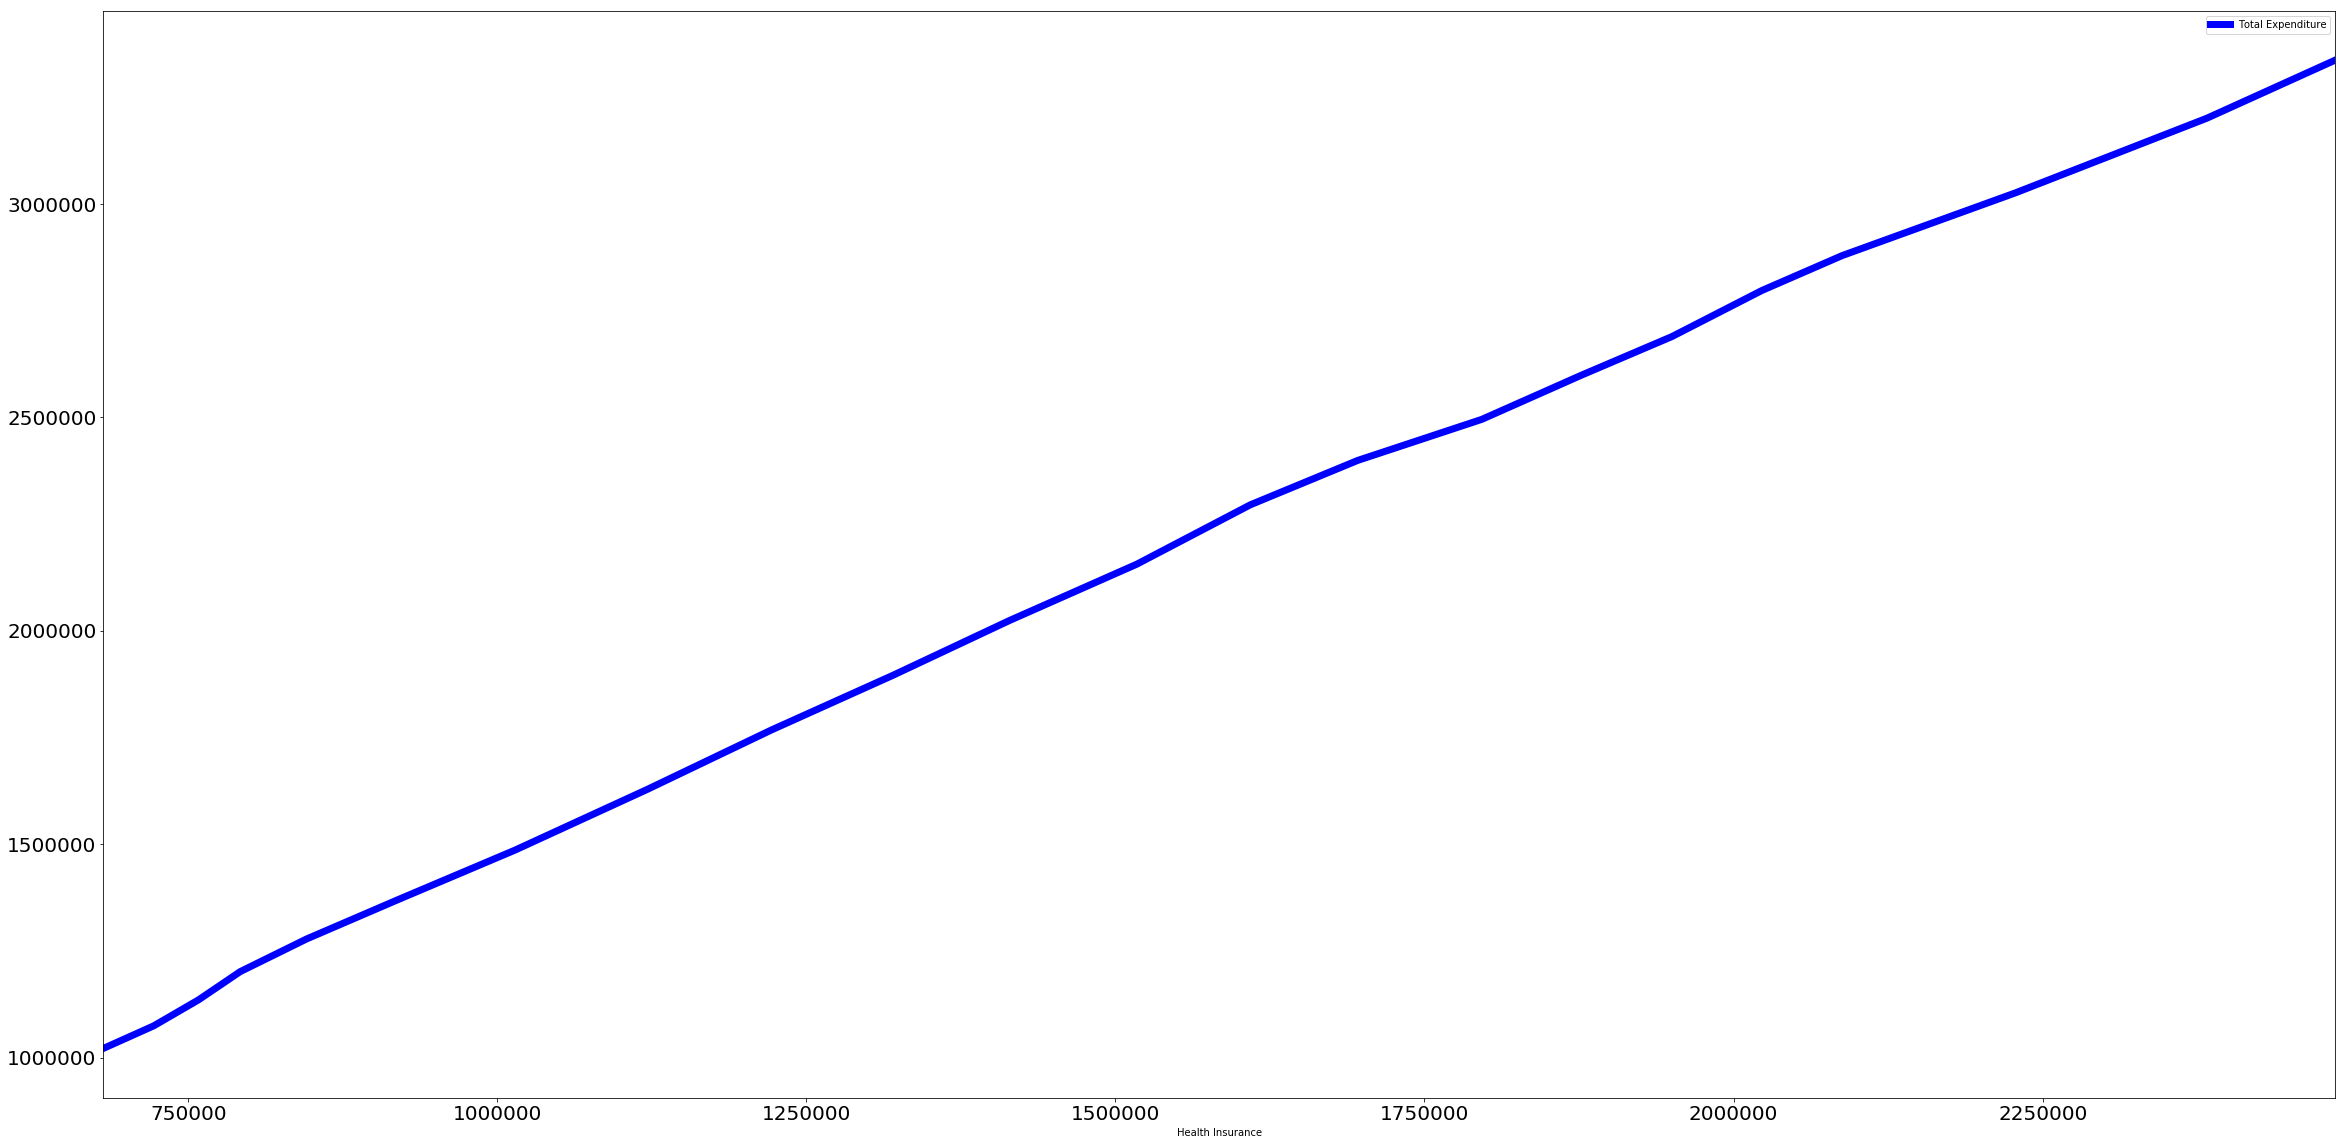

In [24]:
Medicare1.plot(kind='line', figsize=(40,20), fontsize=20 , legend=True, linewidth=7.0, x='Health Insurance', y='Total Expenditure', color ='blue')

### VISUALIZING OVERALL U.S. HEALTH EXPENDITURE USING ALL VARIABLES

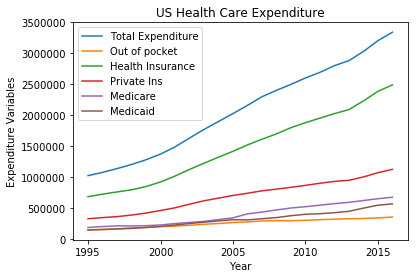

In [14]:
plt.plot(df["Year"], df["Total Expenditure"], label="Total Expenditure")
plt.plot(df["Year"], df["Out of pocket"], label="Out of pocket")
plt.plot(df["Year"], df["Health Insurance"], label="Health Insurance")
plt.plot(df["Year"], df["Private Health Insurance"], label="Private Ins")
plt.plot(df["Year"], df["Medicare"], label="Medicare")
plt.plot(df["Year"], df["Medicaid (Title XIX)"], label="Medicaid")
plt.xlabel("Year")
plt.ylabel("Expenditure Variables")
plt.title("US Health Care Expenditure")
plt.legend()
plt.show()

## VISUALIZING IMPACT OF MEDICARE ON HEALTHCARE EXPENDITURE

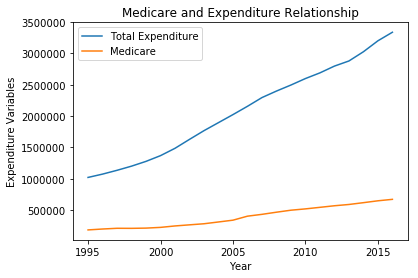

In [15]:
plt.plot(df["Year"], df["Total Expenditure"], label="Total Expenditure")
plt.plot(df["Year"], df["Medicare"], label="Medicare")
plt.xlabel("Year")
plt.ylabel("Expenditure Variables")
plt.title("Medicare and Expenditure Relationship")
plt.legend()
plt.show()

## VISUALIZING IMPACT OF MEDICAID ON HEALTHCARE EXPENDITURE

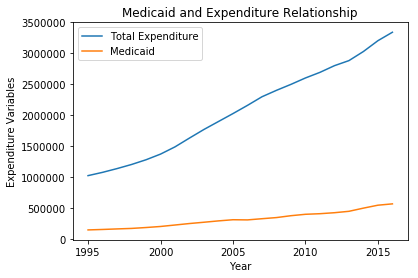

In [16]:
plt.plot(df["Year"], df["Total Expenditure"], label="Total Expenditure")
plt.plot(df["Year"], df["Medicaid (Title XIX)"], label="Medicaid")
plt.xlabel("Year")
plt.ylabel("Expenditure Variables")
plt.title("Medicaid and Expenditure Relationship")
plt.legend()
plt.show()

In [40]:
df[['Total Expenditure']].resample('A').mean().sort_values(by='Total Expenditure')

,Total Expenditure
Date,
1995-12-31,1021635
1996-12-31,1074409
1997-12-31,1135224
1998-12-31,1201451
1999-12-31,1277700
2000-12-31,1369125
2001-12-31,1486158
2002-12-31,1628624
2003-12-31,1767567


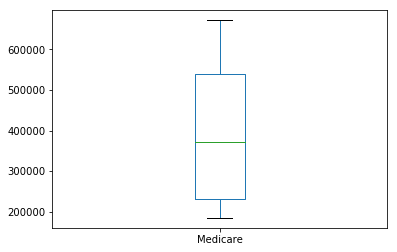

In [346]:
df.Medicare.plot(kind='box')

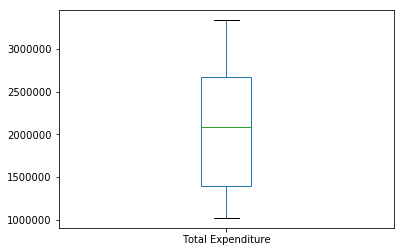

In [271]:
df['Total Expenditure'].plot(kind='box')

## CHECKING TOTAL EXPENDITURE CORRELATION IN THE HEALTHCARE SYSTEM

In [28]:
df['Total Expenditure'].resample('A').mean().autocorr(lag=1)

0.99925761014641656

## PLOTTING THE ROLLING MEAN FOR THE ANNUAL HEALTHCARE EXPENDITURE

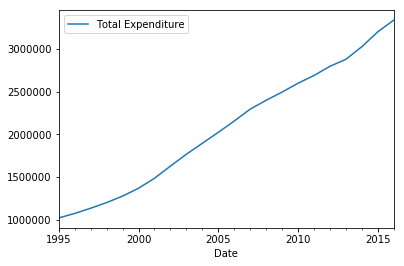

In [269]:
df[['Total Expenditure']].rolling(window=1).mean().plot()

## COMPUTING/PLOTTING 1, 2, 5, AND 10 YR AUTOCORRELATIONS FOR ALL EXPENDITURE

In [30]:
print('Autocorrelation 1: ', df['Total Expenditure'].autocorr(1))
print('Autocorrelation 2: ', df['Total Expenditure'].autocorr(2))
print('Autocorrelation 5: ', df['Total Expenditure'].autocorr(5))
print('Autocorrelation 10: ', df['Total Expenditure'].autocorr(10))

Autocorrelation 1:  0.999257610146
Autocorrelation 2:  0.997324827822
Autocorrelation 5:  0.988860595717
Autocorrelation 10:  0.988289784789


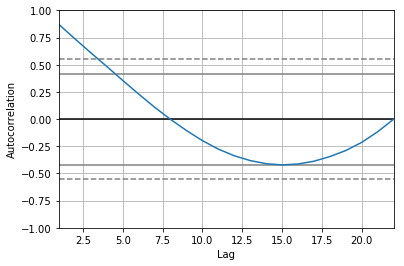

In [31]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Total Expenditure'])

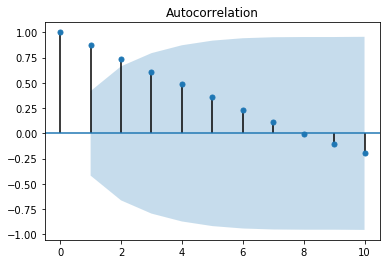

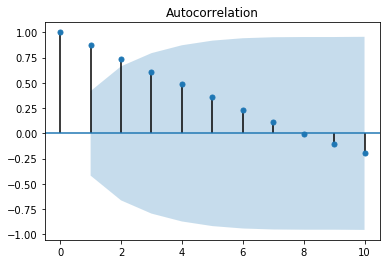

In [264]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Total Expenditure'], lags=10)

### AGGREGATES OVER TIME FOR THE TOTAL EXPENDITURE

In [267]:
df[['Total Expenditure']].resample('A', how=['median', 'mean'])

/Users/judenwosu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


Total Expenditure         
                      median     mean
Date                                 
1995-12-31           1021635  1021635
1996-12-31           1074409  1074409
1997-12-31           1135224  1135224
1998-12-31           1201451  1201451
1999-12-31           1277700  1277700
2000-12-31           1369125  1369125
2001-12-31           1486158  1486158
2002-12-31           1628624  1628624
2003-12-31           1767567  1767567
2004-12-31           1895724  1895724
2005-12-31           2023744  2023744
2006-12-31           2156158  2156158
2007-12-31           2295307  2295307
2008-12-31           2399121  2399121
2009-12-31           2495414  2495414
2010-12-31           2598823  2598823
2011-12-31           2689349  2689349
2012-12-31           2797260  2797260
2013-12-31           2879008  2879008
2014-12-31           3026157  3026157
2015-12-31           3200815  3200815
2016-12-31           3337248  3337248